# Pauli Spin Blockade Plots

Plot the results of whats going on

In [1]:
%matplotlib inline
import local_broom

%load_ext autoreload
%autoreload 2

Added 'quench/' and 'quench/libraries' for easy importing.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from monty import Monty
import paul

### Plot Functions

In [60]:
# 1D plots

def plot_amp_phase(X, amp, phase, name="amp_phase", xlabel="P1 voltage", save=False):
    """Plot both amplitude and phase of a result."""
    fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True)

    ax0.plot(X, amp, ".-", color="steelblue")
    ax1.plot(X, phase, ".-", color="orange")
    
    ax0.set_ylabel("Amplitude")
    ax1.set_ylabel("Phase")
    ax0.set_title(monty.plot_title + "." + name)
    ax1.set_xlabel(xlabel)
    
    ax0.grid()
    ax1.grid()
    fig.align_ylabels([ax0, ax1])
    plt.tight_layout()

    if save:
        monty.savefig(plt, name)

def plot_st_fb(X, st_result):

    fig, ax = plt.subplots()
    
    ax.plot(X, st_result[0])
    ax.set_xlabel("P1 voltage (V)")
    ax.set_ylabel("ST amplitude (a.u.)")
    ax.set_title(monty.plot_title + ".st_history")
    plt.tight_layout()
    
    monty.savefig(plt, "st_history")

In [49]:
# 2D plots



### Load the run data

In [94]:
monty = Monty("rf.psb_better")
print(monty.experiment)

result = monty.loadrun("hyper_j.11")

params = monty.parameters["parameters"]
params

Loading existing experiment (ignoring given experiment parameters)
Note that no experimental data has been loaded.
Next run will have id 81
{'desc': 'PSB sequence better version.'}
Loading 'C:\Users\LD2007\Documents\Si_CMOS_james\data\rf/psb_better\hyper_j.11.xz'


{'amplitude_volts': {'measure_pulse_end': {'J': 0.0, 'P1': -0.01, 'P2': 0.01},
  'measure_pulse_start': {'J': 0.0, 'P1': 0.0, 'P2': 0.0},
  'mixed_pulse': {'P1': -0.2, 'P2': 0.2},
  'ramp_rate': 0.00013},
 'averaging': {'num_detuning': 10, 'num_j': 1, 'seqc_averages': 200},
 'feedback': {'slope': 0, 'stepsize': 0.02, 'target': -24.1},
 'gates': {'APBCLK': 0.0,
  'BGN1P0': 0.0,
  'BGN1P8': 0.0,
  'BGP1P0': 0.0,
  'BGP1P8': 0.0,
  'LCB': 0.150004,
  'MOSI': 0.0,
  'P1': 1.805204,
  'P2': 1.919703,
  'P3': 0.0,
  'RCB': 0.150003,
  'RG': 0.0,
  'RST': 1.799996,
  'ResB': 0.0,
  'SCLK': 0.0,
  'SETB': 0.0,
  'SLB': 0.930001,
  'SRB': 0.929996,
  'SS_N': 1.8,
  'ST': 3.682674,
  'VDD1P0': 0.999996,
  'VDD1P8': 1.800005,
  'VDD1P8_ANA': 1.8,
  'VHFG': 0.0,
  'VICL': 3.199998,
  'VLFG': 0.0,
  'VSS1P0': 0.0,
  'VSS1P8': 0.0,
  'bias': 0.0},
 'powers': {'acq_in': 0, 'acq_out': -10, 'drive': 0},
 'readout': {'freq': 406600000.0, 'gain': 0.95, 'time': 0.0001},
 'temp': 'Mixing chamber 0.0153449 

In [95]:
data = result["data"]
data.shape

(1, 20)

In [99]:
ref = data[:, ::2]
mes = data[:, 1::2]

ref_amp = paul.autodb(ref)
ref_phase = paul.autodeg(ref)
mes_amp = paul.autodb(mes)
mes_phase = paul.autodeg(mes)  # add axis for unwrap?

# X axis (p1_steps)
p1_steps = np.linspace(params["amplitude_volts"]["measure_pulse_start"]["P1"],
                       params["amplitude_volts"]["measure_pulse_end"]["P1"],
                       params["averaging"]["num_detuning"])
X = p1_steps
j_steps = np.linspace(params["amplitude_volts"]["measure_pulse_start"]["J"],
                      params["amplitude_volts"]["measure_pulse_end"]["J"],
                      params["averaging"]["num_j"])

### 1D Plots

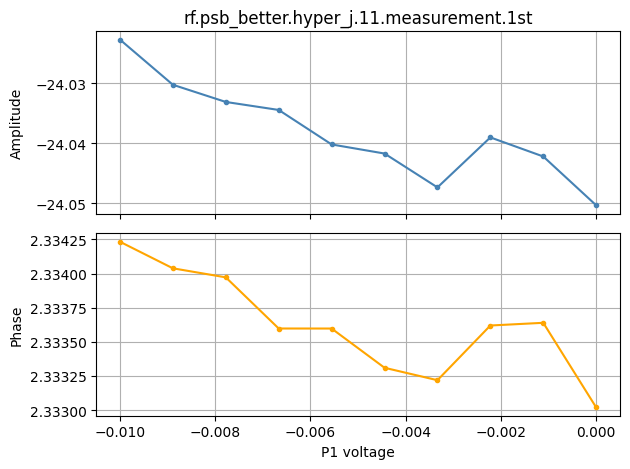

In [100]:
plot_amp_phase(X, mes_amp[0], mes_phase[0],
               name="measurement.1st",
               xlabel="P1 voltage",
               save=False)

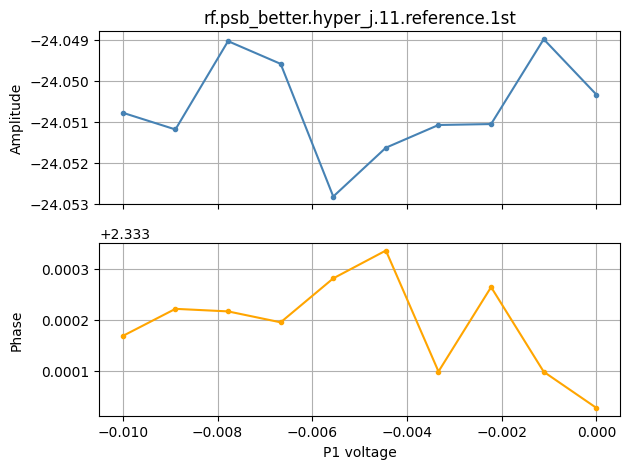

In [101]:
plot_amp_phase(X, ref_amp[0], ref_phase[0],
               name="reference.1st",
               xlabel="P1 voltage",
               save=False)

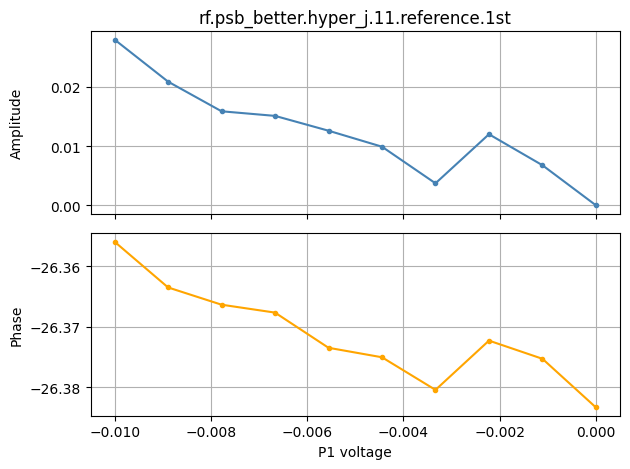

In [102]:
j_run = 0  # which index in j to plot
plot_amp_phase(X, mes_amp[j_run]-ref_amp[j_run], mes_amp[j_run]-ref_phase[j_run],
               name="reference.1st",
               xlabel="P1 voltage",
               save=False)

### 2D Plots

In [75]:
# Note that none of these plots will work if we take no steps in j...

if len(j_steps) < 2:
    raise ValueError("Not enough steps in J for 2D plotting")

ValueError: Not enough steps in J for 2D plotting

C:\Users\LD2007\AppData\Local\Temp\ipykernel_11536\1310746089.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()


Text(0.5, 1.0, 'rf.psb_better.j_and_detuning.13.mes_amp_stepsize')

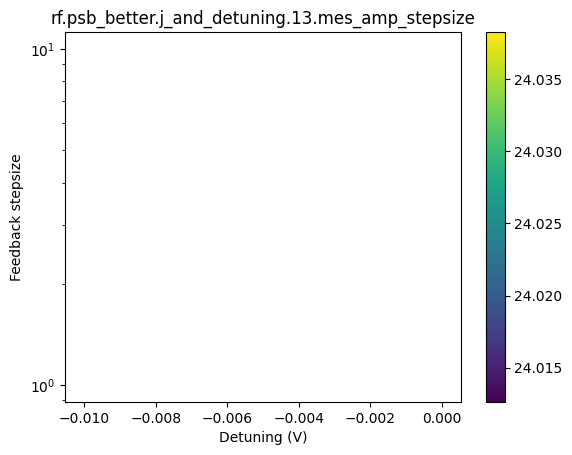

In [74]:
plt.figure()
plt.pcolormesh(X, j_steps, np.abs(mes_amp), shading="nearest")
plt.colorbar()
plt.ylabel("Feedback stepsize")
plt.xlabel("Detuning (V)")
plt.semilogy()
plt.title(monty.plot_title + ".mes_amp_stepsize")

#monty.savefig(plt, "2d mes amp stepsize")

In [82]:
a = np.linspace(3, 2, 10)
b = np.linspace(-24, 3, 10)
for (i, (x,y)) in enumerate(zip(a,b)):
    print(i,x,y)

0 3.0 -24.0
1 2.888888888888889 -21.0
2 2.7777777777777777 -18.0
3 2.6666666666666665 -15.0
4 2.5555555555555554 -12.0
5 2.4444444444444446 -9.0
6 2.3333333333333335 -6.0
7 2.2222222222222223 -3.0
8 2.111111111111111 0.0
9 2.0 3.0


In [88]:
a = np.arange(1, params["averaging"]["num_detuning"]+1)

In [84]:
params["averaging"]["num_detuning"]

10

In [89]:
a


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [90]:
a.shape

(10,)